In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#カレントディレクトリの設定
%cd "/content/drive/MyDrive/修士課程/M1A/情報可視化の理論と実践/infovis-notebooks/exercise_9"

/content/drive/MyDrive/修士課程/M1A/情報可視化の理論と実践/infovis-notebooks/exercise_9


In [3]:
import os

print("カレントディレクトリは[" + os.getcwd() + "]です")
print("配下のディレクトリは" + str(os.listdir()) + "です")

カレントディレクトリは[/content/drive/MyDrive/修士課程/M1A/情報可視化の理論と実践/infovis-notebooks/exercise_9]です
配下のディレクトリは['785_ruby_1656.zip', '1746_ruby_18324.zip', '794_ruby_4237.zip', 'text-vectorization.ipynb', 'text-preprocessing.ipynb', 'text', '.ipynb_checkpoints', 'lib', 'network.html', 'heatmap.png', 'wordcloud.png', 'text-visualization.ipynb', 'text-data-exercise.ipynb']です


# テキストデータの可視化の練習

『三四郎』は、夏目漱石の前記三部作と呼ばれる作品群の一部です。

[『三四郎』](https://www.aozora.gr.jp/cards/000148/card794.html)（1909）・[『それから』](https://www.aozora.gr.jp/cards/000148/card1746.html)（1909）・[『門』](https://www.aozora.gr.jp/cards/000148/card785.html)（1910）の三部作を一つのコーパスとしてまとめて分析してみましょう。

『三四郎』だけの分析と比べると、どのような特徴が出てくるでしょうか？

## データの用意

In [ ]:
# ファイルをダウンロードする
!wget https://www.aozora.gr.jp/cards/000148/files/794_ruby_4237.zip
!wget https://www.aozora.gr.jp/cards/000148/files/1746_ruby_18324.zip
!wget https://www.aozora.gr.jp/cards/000148/files/785_ruby_1656.zip
# textフォルダ作る
!mkdir -p text
# ファイルをtextフォルダに解凍
!unzip -d text -o 794_ruby_4237.zip
!unzip -d text -o 1746_ruby_18324.zip
!unzip -d text -o 785_ruby_1656.zip

In [4]:
# 青空文庫の記法を削除する

import re

input_fn = "text/sanshiro.txt"
output_fn = "text/sanshiro.stripruby.txt"

with open(input_fn, encoding="shift_jis") as fin, open(output_fn, mode="w") as fout:
    for line in fin:
        fout.write(re.sub(r"《[^》]+》|［[^］]+］|〔[^〕]+〕| [｜]", "", line))

In [5]:
input_fn = "text/sorekara.txt"
output_fn = "text/sorekara.stripruby.txt"

with open(input_fn, encoding="shift_jis") as fin, open(output_fn, mode="w") as fout:
    for line in fin:
        fout.write(re.sub(r"《[^》]+》|［[^］]+］|〔[^〕]+〕| [｜]", "", line))

In [6]:
input_fn = "text/mon.txt"
output_fn = "text/mon.stripruby.txt"

with open(input_fn, encoding="shift_jis") as fin, open(output_fn, mode="w") as fout:
    for line in fin:
        fout.write(re.sub(r"《[^》]+》|［[^］]+］|〔[^〕]+〕| [｜]", "", line))

In [7]:
import sys

# 冒頭と末尾の説明を取り除く（何行取り除くかは目視で確認）

if sys.platform == "darwin":
    !brew install coreutils
    !tail -n +22 text/sanshiro.stripruby.txt | ghead -n -14 > text/sanshiro.corpus.txt
else:
    !tail -n +22 text/sanshiro.stripruby.txt | head -n -14 > text/sanshiro.corpus.txt

In [8]:
if sys.platform == "darwin":
    !brew install coreutils
    !tail -n +22 text/sorekara.stripruby.txt | ghead -n -14 > text/sorekara.corpus.txt
else:
    !tail -n +22 text/sorekara.stripruby.txt | head -n -14 > text/sorekara.corpus.txt

In [9]:
if sys.platform == "darwin":
    !brew install coreutils
    !tail -n +18 text/mon.stripruby.txt | ghead -n -14 > text/mon.corpus.txt
else:
    !tail -n +18 text/mon.stripruby.txt | head -n -14 > text/mon.corpus.txt

In [10]:
# 3つのファイルを統合する

!cat text/sanshiro.corpus.txt text/sorekara.corpus.txt text/mon.corpus.txt > text/all.corpus.txt

これで、三作品をまとめて分析する準備ができました。

演習の内容を参考にして、ワードクラウド、共起ネットワーク、共起ヒートマップを作ってみましょう。

In [12]:
#ライブラリのインポート
import spacy

In [13]:
#日本語の形態素解析モデル（ja_ginza）をロード
nlp = spacy.load("ja_ginza")

In [14]:
# ファイルを読み込み、テキストを一行ずつ解析してリスト化する
all_tokens = []
with open("text/all.corpus.txt", "r") as f:
    for line in f:
        tokens = [token for token in nlp(line)]
        all_tokens.extend(tokens)

In [15]:
# 分析対象とする品詞（内容語 - 名詞、動詞、形容詞）と不要語（ストップワード）を指定する
include_pos = ("NOUN", "VERB", "ADJ")
stopwords = ("する", "ある", "ない", "いう", "もの", "こと", "よう", "なる", "ほう", "いる", "くる", "さん")

## ワードクラウド

In [16]:
#分析対象となる言葉のリストを作成
words = [token.lemma_ for token in all_tokens if token.pos_ in include_pos and token.lemma_ not in stopwords]

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [29]:
import numpy as np

In [20]:
# 日本語フォントのダウンロード（Linuxのみ）

if sys.platform == "linux":
    !sudo apt update
    !sudo apt install fonts-ipaexfont

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,196 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,626 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-up

In [21]:
# フォントファイルの場所の指定
if sys.platform == "darwin":
    fpath = "/Library/Fonts/Arial Unicode.ttf"
else:
    fpath = "/usr/share/fonts/opentype/ipaexfont-gothic/ipaexg.ttf"

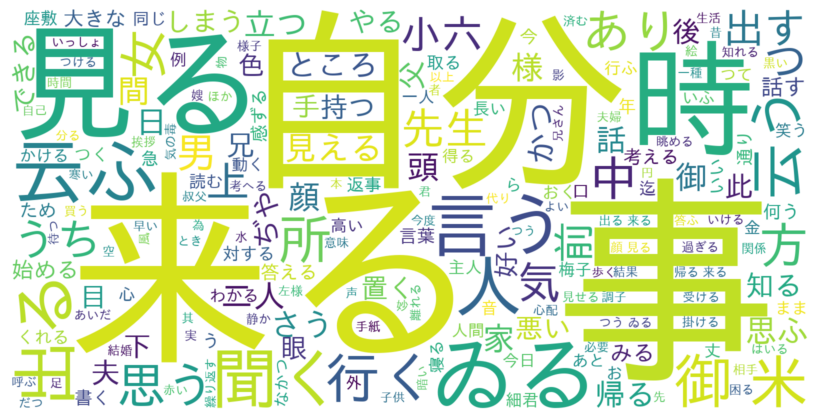

In [22]:
# ワードクラウドの表示設定と作成
wordcloud = WordCloud(
    width=1600, height=800,
    background_color="white", font_path=fpath
).generate(' '.join(words))

# プロット
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig("wordcloud_exercise.png", dpi=300)
plt.show()

## 共起ネットワーク

###共起分析

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
def extract_words(sent, pos_tags, stopwords):
    """
    分析対象の品詞であり、不要語ではない単語を抽出する
    """
    words = [token.lemma_ for token in sent if token.pos_ in pos_tags and token.lemma_ not in stopwords]
    return words

In [30]:
def count_cooccurrence(sents, token_length="{2,}"):
    """
    同じ文中に共起する単語を行列形式で列挙する
    """
    token_pattern = f"\\b\\w{token_length}\\b"
    count_model = CountVectorizer(token_pattern=token_pattern)

    X = count_model.fit_transform(sents)
    words = count_model.get_feature_names_out()
    word_counts = np.asarray(X.sum(axis=0)).reshape(-1)

    X[X > 0] = 1 # 同じ共起が2以上出現しても1とする
    Xc = (X.T * X) # 共起行列を求めるための掛け算をする、csr形式の疎行列

    return words, word_counts, Xc, X

In [26]:
def find_sentence_by_cooccurrence(X, idxs):
    """
    指定された共起を含む文を見つける
    """
    occur_flags = (X[:, idxs[0]] > 0)
    for idx in idxs[1:]:
        occur_flags = occur_flags.multiply(X[:, idx] > 0)

    return occur_flags.nonzero()[0]

In [31]:
# 文章を解析し、共起を求める
input_fn = "text/all.corpus.txt"
include_pos = ("NOUN", "VERB", "ADJ", "PROPN")
stopwords = ("する", "ある", "ない", "いう", "もの", "こと", "よう", "なる", "ほう", "いる", "くる", "さん")

sents = []
with open(input_fn, "r") as f:
    for line in f:
        doc = nlp(line)
        tmp = [' '.join(extract_words(sent, include_pos, stopwords)) for sent in doc.sents]
        sents.extend(tmp)

words, word_counts, Xc, X = count_cooccurrence(sents)

###共起ネットワークの描画

In [ ]:
!pip install networkx pyvis japanize_matplotlib

In [33]:
import networkx as nx
from pyvis.network import Network
import japanize_matplotlib

In [34]:
def word_weights(words, word_counts):
    """
    単語の最多頻度が1となるような相対値として単語の重みを求める
    """
    count_max = word_counts.max()
    weights = [(word, {"weight": count / count_max})
               for word, count in zip(words, word_counts)]
    return weights

In [35]:
def cooccurrence_weights(words, Xc, weight_cutoff):
    """
    共起の最多頻度が1となるような相対値として共起の重みを求める
    共起の重みがweight_cutoffより低い共起は除外する
    """
    Xc_max = Xc.max()
    cutoff = weight_cutoff * Xc_max
    weights = [(words[i], words[j], Xc[i, j] / Xc_max)
               for i, j in zip(*Xc.nonzero()) if i < j and Xc[i, j] > cutoff]
    return weights

In [36]:
def create_network(words, word_counts, Xc, weight_cutoff):
    """
    語、単語頻度、共起行列から共起ネットワークをNetworkX形式で得る
    """
    G = nx.Graph()

    weights_w = word_weights(words, word_counts)
    G.add_nodes_from(weights_w)

    weights_c = cooccurrence_weights(words, Xc, weight_cutoff)
    G.add_weighted_edges_from(weights_c)

    G.remove_nodes_from(list(nx.isolates(G)))
    return G

In [37]:
def pyplot_network(G):
    """
    NetworkX形式で与えられた共起ネットワークをpyplotで描画する
    """
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G, k=0.1)

    weights_n = np.array(list(nx.get_node_attributes(G, "weight").values()))
    nx.draw_networkx_nodes(G, pos, node_size=300 * weights_n)
    weights_e = np.array(list(nx.get_edge_attributes(G, "weight").values()))
    nx.draw_networkx_edges(G, pos, width=20 * weights_e)

    nx.draw_networkx_labels(G, pos, font_family="IPAexGothic")

    plt.axis("off")
    plt.tight_layout()
    plt.show()

In [38]:
def nx2pyvis_G(G):
    """
    NetworkX形式で与えられた共起ネットワークをpyvisで描画する
    """
    pyvis_G = Network(width="800px", height="800px", notebook=True)
    for node, attrs in G.nodes(data=True):
        pyvis_G.add_node(node, title=node, size=30 * attrs["weight"])
    for node1, node2, attrs in G.edges(data=True):
        pyvis_G.add_edge(node1, node2, width=20 * attrs["weight"])

    return pyvis_G

In [65]:
# ネットワークを作る
G = create_network(words, word_counts, Xc, 0.0125)
# 静的ビジュアライゼーション
#pyplot_network(G)
# インタラクティブなビジュアライゼーション
pyvis_G = nx2pyvis_G(G)
pyvis_G.show_buttons()
pyvis_G.show("network_exercise_0.0125.html")

network_exercise_0.0125.html


## 共起ヒートマップ

###共起ヒートマップを作る

In [48]:
# 文章を解析し、共起を求める
include_pos = ("NOUN", "PROPN")
stopwords = ("する", "ある", "ない", "いう", "もの", "こと", "よう", "なる", "ほう", "いる", "くる", "さん")

sents = []
with open(input_fn, "r") as f:
    for line in f:
        doc = nlp(line)
        tmp = [' '.join(extract_words(sent, include_pos, stopwords)) for sent in doc.sents]
        sents.extend(tmp)

words, word_counts, Xc, X = count_cooccurrence(sents)

In [ ]:
# 共起行列Xcは疎行列なので、非ゼロ要素のみをカウンタに格納する
from collections import Counter
counter = Counter()
for i, j in zip(*Xc.nonzero()):
    if i >= j:
        continue
    counter[(i, j)] += Xc[i, j]

# 共起の出現頻度top 20を出力する
for (i, j), c in counter.most_common(20):
    print(f"{c:>3d} ({words[i]}, {words[j]})")

In [53]:
# 行名を用意する

columns = set(Xc.nonzero()[0])
columns_text = [words[i] for i in columns]

In [54]:
# すべて0のデータフレームを用意する

import pandas as pd

df = pd.DataFrame(np.zeros((len(columns), len(columns))), index=columns_text, columns=columns_text)

In [55]:
# データフレームに頻度を入れる

for cord, count in counter.items():
    df.iloc[cord] = count

In [56]:
# 登場人物名のみを取り出す

characters = ["三四郎", "広田", "野々宮", "佐々木", "与次郎", "美禰子", "先生", "原口", "里見"]
df_characters = df[characters].filter(items=characters, axis=0)

###データフレームを作る

In [57]:
!pip install plotly kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.9 MB/s eta 0:00:00


In [58]:
import plotly.express as px

fig = px.imshow(df_characters, color_continuous_scale=px.colors.sequential.Oranges,
                title="『三四郎』の登場人物", width=800, height=800)
fig.update_layout(font=dict(size=16))
fig.show()
fig.write_image("heatmap.png", scale=2)